#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**Also good to know section, power loaw distribution**

using the city-size-japan dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = "/".join(current_path.split("/")[:-2]) + "/"

# location folders
data_in = dirname + "da_data_repo/city-size-japan/clean/"
data_out = dirname + "da_case_studies/ch03-city-size-japan/"
output = dirname + "da_case_studies/ch03-city-size-japan/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
from py_helper_functions import *

In [4]:
city_size = pd.read_csv(data_in + "city-size-japan.csv")

In [5]:
# create variables

city_size["pop"] = city_size["pop_2015"] / 1000
city_size["lnpop"] = np.log(city_size["pop"])
city_size = city_size.sort_values(by="pop", ascending=False).reset_index(drop=True)
city_size["rank"] = [x for x in range(1, len(city_size["pop"]) + 1)]

In [6]:
city_size

,Name,pop_1995,pop_2000,pop_2005,pop_2010,pop_2015,pop,lnpop,rank
0,T?ky? [Tokyo],7967614,8134688,8489653,8945695,9272740,9272.740,9.134834,1
1,Yokohama,3307136,3426651,3579628,3688773,3724844,3724.844,8.222780,2
2,?saka [Osaka],2602421,2598774,2628811,2665314,2691185,2691.185,7.897737,3
3,Nagoya,2152184,2171557,2215062,2263894,2295638,2295.638,7.738766,4
4,Sapporo,1757025,1822368,1880863,1913545,1952356,1952.356,7.576792,5
...,...,...,...,...,...,...,...,...,...
154,Kawanishi,144539,153762,157668,156423,156375,156.375,5.052257,155
155,Hitachinaka (Katsuta),146750,151673,153639,157060,155689,155.689,5.047860,156
156,Noda,152245,151197,151240,155491,153583,153.583,5.034241,157
157,Sayama,162240,161460,158074,155727,152405,152.405,5.026541,158


In [7]:
# ---------------------------------------------------------------
# ln(rank) vs ln(x)

city_size["lnrank"] = np.log(city_size["rank"])

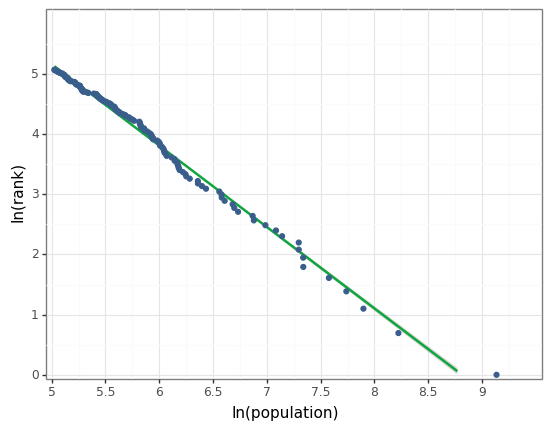

<ggplot: (8738966052645)>

In [8]:
ggplot(city_size, aes(x="lnpop", y="lnrank")) + geom_smooth(
    color=color[1], method="lm"
) + geom_point(color=color[0]) + labs(
    x="ln(population)", y="ln(rank)"
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 6), breaks=seq(0, 6, by=1)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(5, 9.5), breaks=seq(5, 9.5, by=0.5)
) + theme_bw()

In [9]:
# ---------------------------------------------------------------
# scale invariance

x1 = 200
x2 = 300
bound = 0.2

In [10]:
city_size.query("pop >= @x1*(1-@bound)  & pop <= @x1*(1+@bound)").shape[0]

56

In [11]:
city_size.query("pop >= @x2*(1-@bound) & pop <= @x2*(1+@bound)").shape[0]

37

In [12]:
shift = 3
x3 = x1 * shift
x4 = x2 * shift

In [13]:
city_size.query("pop >= @x3*(1-@bound)  & pop <= @x3*(1+@bound)").shape[0]

13

In [14]:
city_size.query("pop >= @x4*(1-@bound) & pop <= @x4*(1+@bound)").shape[0]

7